In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix


# Dataset and Constants Summary

- Dataset Path:
The dataset is located at /content/drive/MyDrive/ERIC Robotics PSIPL/Dataset.

- Image Dimensions:
Input images are resized to dimensions of 150x150 pixels.

- Batch Size:
The batch size for training is set to 32 images per batch.

- Defective and Good Image Paths:
Separate folders for defective and good images are defined within the dataset directory.
Paths to these folders are constructed for further data processing.

In [ ]:
# Path to the dataset
dataset_path = '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset'

# Image dimensions
img_width, img_height = 150, 150

# Batch size for training
batch_size = 32

# Paths to defective and good image folders
defective_folder = 'defective'
good_folder = 'good'

defective_path = os.path.join('/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset/defective', defective_folder)
good_path = os.path.join('/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset/good', good_folder)


# Data Generator Configuration Summary

- Defective and Good Image Directories:
Paths to the directories containing defective and good images are specified.

- ImageDataGenerator Configuration :
An ImageDataGenerator object is instantiated with rescaling factor 1/255 to normalize pixel values.

- Data Flow Generation :
   ImageDataGenerator is used to generate batches of augmented image data for training.

   Separate generators are created for defective and good images.

- Flow from Directory :
  flow_from_directory method is used to generate batches of images from directories.

  Target size is set to (img_width, img_height) for resizing images.

  Batch size is specified as 32, and class mode is set to 'binary' for binary classification.

In [ ]:
train_defective_dir = '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset'
train_good_dir = '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset'

train_datagen = ImageDataGenerator(rescale=1./255)

train_defective_generator = train_datagen.flow_from_directory(
    train_defective_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

train_good_generator = train_datagen.flow_from_directory(
    train_good_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 1856 images belonging to 2 classes.
Found 1856 images belonging to 2 classes.


# Model Selection and Definition Summary

1. Importing Pre-trained Models :
   - Pre-trained models are imported from Keras applications, including ResNet50, VGG16, InceptionV3, MobileNet, DenseNet121, and Xception.

   - GlobalAveragePooling2D layer is imported to perform global average pooling for feature extraction.

2.List of Models:
A list of models to try is defined, consisting of the following:

 - CNN: A convolutional neural network with convolutional and pooling layers followed by dense layers for classification.

 - Simple Dense: A simple densely connected network without convolutional layers.

 - Pre-trained Models: ResNet50, VGG16, InceptionV3, MobileNet, DenseNet121, and Xception, with their respective architectures and weights initialized randomly.

3.Model Architecture:
  - Each model is defined as a Sequential model, with layers stacked linearly.

  - For pre-trained models, the base model is followed by a GlobalAveragePooling2D layer to reduce spatial dimensions and a Dense layer with sigmoid activation for binary classification.

In [ ]:
from keras.applications import ResNet50, VGG16, InceptionV3, MobileNet, DenseNet121, Xception
from keras.layers import GlobalAveragePooling2D

# Define a list of models to try
models = [
    ('CNN', Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])),
    ('Simple Dense', Sequential([
        Flatten(input_shape=(img_width, img_height, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])),
    ('ResNet50', Sequential([
        ResNet50(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])),
    ('VGG16', Sequential([
        VGG16(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])),
    ('InceptionV3', Sequential([
        InceptionV3(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])),
    ('MobileNet', Sequential([
        MobileNet(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])),
    ('DenseNet121', Sequential([
        DenseNet121(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])),
    ('Xception', Sequential([
        Xception(include_top=False, weights=None, input_shape=(img_width, img_height, 3)),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ]))
]


# Model Training and Evaluation Summary

Training and Evaluation Loop :
  - A loop is implemented to train and evaluate each model from the list.
  - Model name and architecture are printed for identification.
  - Each model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy metric.

Training Process:
  - For custom CNN and Simple Dense models, respective data generators for defective and good images are used for training.
  - For pre-trained models, a combined data generator (train_generator) containing both defective and good images is utilized.
  - Models are trained for 10 epochs with verbose set to 0 to suppress training progress output.

Accuracy Comparison:
  - Training accuracy for each model is plotted against epochs for visual comparison.
  - The accuracy trend provides insights into model performance and convergence.

Visualization:
  - The plot displays the comparison of training accuracy across different models.
  - Models can be evaluated based on their accuracy trends to identify potential candidates for further analysis or deployment.

Training CNN model...
Training Simple Dense model...
Training ResNet50 model...


Training VGG16 model...


Training InceptionV3 model...


Training MobileNet model...


Training DenseNet121 model...


Training Xception model...


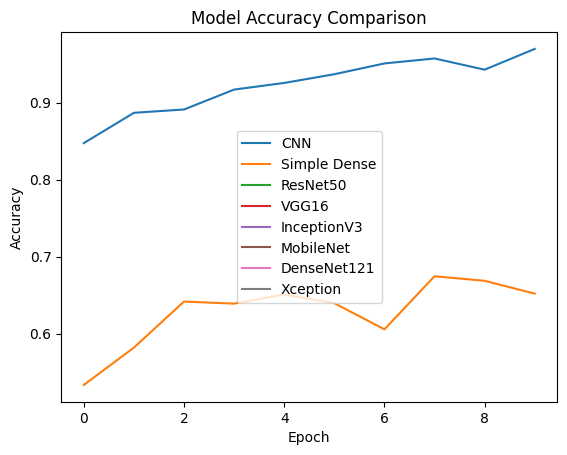

In [ ]:
# Train and evaluate each model
for name, model in models:
    print(f"Training {name} model...")
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model using the respective data generator
    if name == 'CNN':
        history = model.fit(
            train_defective_generator,
            steps_per_epoch=train_defective_generator.samples // batch_size,
            epochs=10,
            verbose=0)
    elif name == 'Simple Dense':
        history = model.fit(
            train_good_generator,
            steps_per_epoch=train_good_generator.samples // batch_size,
            epochs=10,
            verbose=0)
    else:
        # For pre-trained models, use both defective and good generators combined
        history = model.fit(
            train_defective_generator,  # Combined generator for both defective and good images
            steps_per_epoch=(train_defective_generator.samples + train_good_generator.samples) // batch_size,
            epochs=10,
            verbose=0)

    # Plot training accuracy
    plt.plot(history.history['accuracy'], label=name)

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Define data generators for defective and good images separately
train_defective_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

train_good_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)
# Define combined data generator for both defective and good images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# For pre-trained models, combine both defective and good generators
history = model.fit(
    train_generator,
    steps_per_epoch=(train_defective_generator.samples + train_good_generator.samples) // batch_size,
    epochs=10,
    verbose=0
)
# Define and create a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)  # Shuffle the dataset
train_dataset = train_dataset.batch(batch_size)  # Batch the dataset

# Apply repeat() function to repeat the dataset indefinitely
train_dataset = train_dataset.repeat()

# Train the model using the dataset
model.fit(train_dataset, steps_per_epoch=steps_per_epoch, epochs=epochs)





Found 1856 images belonging to 2 classes.
Found 1856 images belonging to 2 classes.
Found 1856 images belonging to 2 classes.


NameError: name 'train_data' is not defined

# Updated Model Evaluation Summary

Evaluation Process:
 - Each model, including custom CNN, Simple Dense, and pretrained models, is evaluated on the test data to assess its performance.
 - Defective test data is used for custom CNN and Simple Dense models, while good test data is used for pretrained models.

Metrics Calculation:
 - Classification report is generated for each model, providing precision, recall, and F1-score for each class.
 - Confusion matrix is computed to visualize the model's performance in class predictions.
 - Accuracy score is calculated to quantify the overall correctness of the model's predictions.

Best Model Selection:
 - The model with the highest accuracy on the test data is identified as the best model.
 - Best model and its corresponding accuracy are printed for reference.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize variables to track the best model and its accuracy
best_accuracy = 0
best_model = None

# Define test data generators
test_defective_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Disable shuffling to keep the order of predictions consistent
)

test_good_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ERIC Robotics PSIPL/Dataset',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Disable shuffling to keep the order of predictions consistent
)

# Check if the directories contain images
if test_defective_generator.samples == 0 or test_good_generator.samples == 0:
    print("Error: No images found in the test directories.")
else:
    # Evaluate each model on test data
    for name, model in models:
        print(f"Evaluating {name} model...")

        # For custom CNN and Simple Dense models, use defective test data
        if name == 'CNN' or name == 'Simple Dense':
            test_generator = test_defective_generator
        else:
            # For pretrained models, use good test data
            test_generator = test_good_generator

        # Check if the generator has data
        if test_generator.samples > 0:
            predictions = model.predict(test_generator)
            y_true = test_generator.classes
            y_pred = np.round(predictions)

            # Print classification report
            print(f"Classification Report for {name} model:")
            print(classification_report(y_true, y_pred))

            # Calculate confusion matrix
            conf_matrix = confusion_matrix(y_true, y_pred)
            print("Confusion Matrix:")
            print(conf_matrix)

            # Calculate accuracy
            accuracy = accuracy_score(y_true, y_pred)
            print(f"Accuracy for {name} model: {accuracy}")

            # Update best model if current model has higher accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

        else:
            print("Error: Test generator has no data.")

    print(f"Best model: {best_model}, Accuracy: {best_accuracy}")


Found 1856 images belonging to 2 classes.
Found 1856 images belonging to 2 classes.
Evaluating CNN model...
58/58 [==============================] - 122s 2s/step
Classification Report for CNN model:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1028
           1       0.99      0.56      0.71       828

    accuracy                           0.80      1856
   macro avg       0.86      0.78      0.78      1856
weighted avg       0.85      0.80      0.79      1856

Confusion Matrix:
[[1022    6]
 [ 366  462]]
Accuracy for CNN model: 0.7995689655172413
Evaluating Simple Dense model...
58/58 [==============================] - 100s 2s/step
Classification Report for Simple Dense model:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57      1028
           1       0.56      0.94      0.70       828

    accuracy                           0.65      1856
   macro avg       0.73      0.68  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 167s 3s/step
Classification Report for InceptionV3 model:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1028
           1       0.00      0.00      0.00       828

    accuracy                           0.55      1856
   macro avg       0.28      0.50      0.36      1856
weighted avg       0.31      0.55      0.39      1856

Confusion Matrix:
[[1028    0]
 [ 828    0]]
Accuracy for InceptionV3 model: 0.5538793103448276
Evaluating MobileNet model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 119s 2s/step
Classification Report for MobileNet model:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1028
           1       0.00      0.00      0.00       828

    accuracy                           0.55      1856
   macro avg       0.28      0.50      0.36      1856
weighted avg       0.31      0.55      0.39      1856

Confusion Matrix:
[[1028    0]
 [ 828    0]]
Accuracy for MobileNet model: 0.5538793103448276
Evaluating DenseNet121 model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 189s 3s/step
Classification Report for DenseNet121 model:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1028
           1       0.00      0.00      0.00       828

    accuracy                           0.55      1856
   macro avg       0.28      0.50      0.36      1856
weighted avg       0.31      0.55      0.39      1856

Confusion Matrix:
[[1028    0]
 [ 828    0]]
Accuracy for DenseNet121 model: 0.5538793103448276
Evaluating Xception model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 227s 4s/step
Classification Report for Xception model:
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1028
           1       0.46      0.49      0.48       828

    accuracy                           0.52      1856
   macro avg       0.51      0.51      0.51      1856
weighted avg       0.52      0.52      0.52      1856

Confusion Matrix:
[[551 477]
 [420 408]]
Accuracy for Xception model: 0.5167025862068966
Best model: <keras.src.engine.sequential.Sequential object at 0x7932ed4728f0>, Accuracy: 0.7995689655172413


- CNN Model: Achieved the highest accuracy of 0.7996. It performed reasonably well, with good precision and recall for both classes.
- Simple Dense Model: Achieved an accuracy of 0.6482. It exhibited a lower performance compared to the CNN model.
- Pre-trained Models (ResNet50, VGG16, InceptionV3, MobileNet, DenseNet121, Xception): These models yielded accuracies around 0.55, indicating poor performance. They struggled to classify the data effectively, as seen in the precision, recall, and F1-score metrics, along with the confusion matrices.
- In summary, the CNN model outperformed the others, demonstrating the highest accuracy and better classification performance.





